# Text Analytics Project

In [14]:
#Import packages
import pandas as pd
import nltk
nltk.download( 'vader_lexicon' )
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import timeit
import datetime

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\treyh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
#Read in reviews datasets
reviews = pd.read_csv('C:/Users/treyh/OneDrive/Documents/Documents/IAA/Text Analytics/tiktok_app_reviews.csv')
weekly_scores = pd.read_csv('C:/Users/treyh/OneDrive/Documents/Documents/IAA/Text Analytics/perweek.csv')
scored_reviews = pd.read_csv('C:/Users/treyh/OneDrive/Documents/Documents/IAA/Text Analytics/scored_reviews.csv')

#Fix date and trim to after 2018
scored_reviews["posted_date"] = pd.to_datetime(scored_reviews["posted_date"])
scored_reviews["posted_date"] = scored_reviews["posted_date"].dt.date
scored_reviews = scored_reviews[scored_reviews["posted_date"] >= datetime.datetime.strptime('2018-01-01', "%Y-%m-%d").date()]



C:\Users\treyh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\treyh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
#Example of text with an emoji
reviews.iloc[29,1]


'No glitches or hick ups as of yet, rather enjoying using the app 👍 Update, tried to log into my account via phone, says server error but our internet is fine, tried signing in with my facebook account, still server error, is the site under maintenance by any chance? Or will I need to uninstall then re-install?'

In [13]:
#Get scoring of example text
sentiment = SentimentIntensityAnalyzer()
score = sentiment.polarity_scores(reviews.iloc[327,1])
score
#print( score['neg'])
#print( score['pos'])


{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.8126}

## Modelling

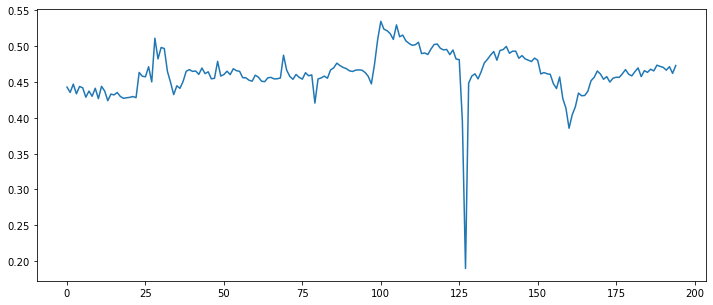

In [8]:
plt.figure( figsize = ( 12, 5))
plt.plot(weekly_scores["Positive"])
#positive_avg



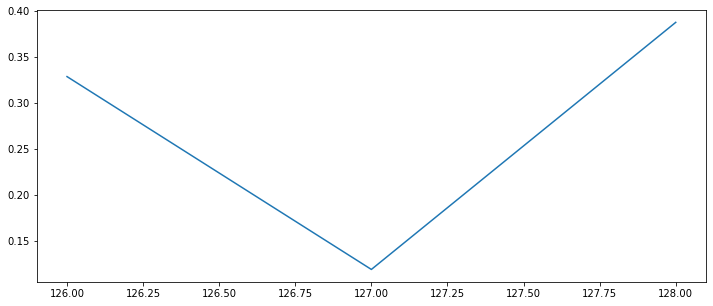

In [9]:
#Plot dip in time plot
test = weekly_scores[(weekly_scores["WeekDate"] >= '2020-06-01') & (weekly_scores["WeekDate"] <= '2020-06-15')]

plt.figure( figsize = ( 12, 5))
plt.plot(test["Compound"])

In [10]:
#Look at dataset around time of weird dip in the line plot
test2 = scored_reviews[(scored_reviews["posted_date"] >= datetime.datetime.strptime('2020-06-01', "%Y-%m-%d").date()) & (scored_reviews["posted_date"] <= datetime.datetime.strptime('2020-06-15', "%Y-%m-%d").date())]
test2

,Unnamed: 0,review_id,review_text,upvotes,app_version,posted_date,Positive,Negative,Neutral,Compound
606780,606780,gp:AOqpTOFiFMv8Ds6OzJFwZfweMqyuIx9KlK0toZhAJoR...,Super and excellent app,1,16.4.4,2020-06-09,0.792,0.000,0.208,0.8225
656357,656357,gp:AOqpTOFYFq93ZQ_o1yRUC_6lKpfrgcZlSSE_ngUb6Ti...,I have complete 2k followers but still i dont ...,0,16.0.4,2020-06-10,0.000,0.000,1.000,0.0000
770653,770653,gp:AOqpTOEkHjtiUhlFxN8A3b8xMCxwAD371oUaOh8qrwN...,Amazing app very entertaining,23,16.3.5,2020-06-09,0.778,0.000,0.222,0.7902
792883,792883,gp:AOqpTOGChMoHAHEh7Q451z7rPwkUn8w4d1guY6R2woy...,So nice tiktok of the channel,3,16.0.4,2020-06-01,0.382,0.000,0.618,0.4754
798656,798656,gp:AOqpTOFPwTZQjIkzfJV2vYUsf-mdCvKEfLQWnMc6pam...,It says bad words... Wtf,4,NaN,2020-06-08,0.000,0.709,0.291,-0.8074
866941,866941,gp:AOqpTOHzHjobNNU7DGacAp1wtbAnO0yDQ14K1l09UOj...,Thos is lingnsokd mavi.si dkmfk mavsk malekidb...,0,NaN,2020-06-03,0.000,0.000,1.000,0.0000
1026280,1026280,gp:AOqpTOEy4dLrmOTe-c9PIu-DHxbtNlNvmKXDXONj5BF...,Nice to tik tok app,2,16.0.43,2020-06-02,0.412,0.000,0.588,0.4215
1069724,1069724,gp:AOqpTOE8X0pXze9VqsZmZw8NIDsqprG0LeAX2lAQmcp...,It's really bad.and net waste in this app.,2,16.0.43,2020-06-02,0.000,0.304,0.696,-0.4703
1135219,1135219,gp:AOqpTOEWg5e5-qcb-D2cy5GNgQLIg11uqYSH5_P-Jdr...,I like and love it,0,NaN,2020-06-02,0.770,0.000,0.230,0.7717
1217878,1217878,gp:AOqpTOHi3c9iIXlL4ZJiCOjWij5t2x4qRU2HTJiNiAy...,I have 4k fan But have live copsan (uesr id =@...,4,16.3.5,2020-06-11,0.277,0.000,0.723,0.5574


## Topic Detection

In [17]:
#Create subset for post-covid
topic_det_set = scored_reviews[(scored_reviews["posted_date"] >= datetime.datetime.strptime('2020-03-01', "%Y-%m-%d").date()) ]


In [15]:
############################################ Start of topic detection #####################################################
##Functions to perform lemmatize and stem preprocessing steps on the data set.
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
##Preview after preprocessing.
doc_sample = " ".join(topic_det_set['review_text'].astype(str))
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
#print(words)
print('\n\n tokenized and lemmatized document: ')
stemmer = SnowballStemmer('english')
#print(preprocess(doc_sample))


original document: 


 tokenized and lemmatized document: 


In [11]:
##Preprocess the text

processed_docs = topic_det_set['review_text'].astype(str).map(preprocess)
processed_docs[:10]

##Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        
##Filter dictionary by: less than 15 appearances, 100000 most frequent tokens
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

0 environ
1 excel
2 find
3 follow
4 give
5 interest
6 peopl
7 privat
8 public
9 rediscov
10 respect


In [18]:
## For each document we create a dictionary reporting how many words and how many times those words appear, save in bow_corpus

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

bow_doc_10 = bow_corpus[1]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
                                                bow_doc_10[i][1]))

Word 13 ("video") appears 1 time.
Word 15 ("content") appears 1 time.
Word 16 ("continu") appears 1 time.
Word 17 ("duet") appears 1 time.
Word 18 ("featur") appears 2 time.
Word 19 ("foryou") appears 1 time.
Word 20 ("friend") appears 1 time.
Word 21 ("great") appears 2 time.
Word 22 ("improv") appears 1 time.
Word 23 ("like") appears 2 time.
Word 24 ("load") appears 1 time.
Word 25 ("lot") appears 1 time.
Word 26 ("page") appears 1 time.
Word 27 ("popular") appears 1 time.
Word 28 ("post") appears 1 time.
Word 29 ("pretti") appears 1 time.
Word 30 ("scam") appears 1 time.
Word 31 ("share") appears 1 time.
Word 32 ("sponsor") appears 1 time.
Word 33 ("star") appears 1 time.
Word 34 ("thing") appears 1 time.
Word 35 ("trend") appears 1 time.
Word 36 ("work") appears 1 time.


In [14]:
##Create tf-idf model object, then apply transformation to the entire corpus. Preview TF-IDF scores for our first document.

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4731240406971272),
 (1, 0.22252211427719842),
 (2, 0.20969636335926012),
 (3, 0.09671366348978007),
 (4, 0.13702638380552998),
 (5, 0.12671484483306392),
 (6, 0.09785438796184555),
 (7, 0.1889440679215618),
 (8, 0.18370141818458896),
 (9, 0.20801926513482452),
 (10, 0.23092475449593694),
 (11, 0.4500803646935426),
 (12, 0.44653670634307163),
 (13, 0.06932500094922935),
 (14, 0.23682364948209933)]


In [15]:
##Train our lda model using gensim.models.LdaMulticore 

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

##For each topic, we will explore the words occuring in that topic and its relative weight.

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.078*"enjoy" + 0.032*"goog" + 0.027*"yeet" + 0.025*"brilliant" + 0.024*"platform" + 0.022*"mejor" + 0.022*"encanta" + 0.019*"ajay" + 0.017*"mass" + 0.016*"talent"
Topic: 1 
Words: 0.455*"love" + 0.254*"tiktok" + 0.035*"fantast" + 0.030*"awsom" + 0.026*"king" + 0.024*"happi" + 0.019*"appp" + 0.014*"epic" + 0.012*"miss" + 0.009*"life"
Topic: 2 
Words: 0.279*"cool" + 0.039*"famous" + 0.030*"game" + 0.023*"music" + 0.022*"thing" + 0.021*"danc" + 0.021*"buena" + 0.021*"video" + 0.020*"friend" + 0.019*"post"
Topic: 3 
Words: 0.291*"awesom" + 0.126*"entertain" + 0.115*"mast" + 0.073*"time" + 0.058*"bhai" + 0.046*"pass" + 0.015*"free" + 0.010*"goood" + 0.009*"akash" + 0.009*"faltu"
Topic: 4 
Words: 0.713*"nice" + 0.040*"superb" + 0.024*"star" + 0.023*"supar" + 0.019*"bahut" + 0.013*"nise" + 0.009*"work" + 0.006*"updat" + 0.006*"hard" + 0.006*"liy"
Topic: 5 
Words: 0.430*"like" + 0.038*"follow" + 0.028*"year" + 0.020*"perfect" + 0.019*"dope" + 0.016*"live" + 0.014*"noic" + 0.0

In [16]:
##Using tfdif instead of bow corpus

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.295*"best" + 0.258*"awesom" + 0.046*"thank" + 0.046*"khan" + 0.029*"experi" + 0.021*"جميل" + 0.015*"appp" + 0.010*"برنامج" + 0.010*"رائع" + 0.010*"تطبيق"
Topic: 1 Word: 0.028*"foryou" + 0.023*"follow" + 0.021*"kumar" + 0.019*"account" + 0.015*"tiktok" + 0.014*"video" + 0.013*"view" + 0.013*"live" + 0.013*"singh" + 0.011*"famous"
Topic: 2 Word: 0.140*"app" + 0.054*"star" + 0.052*"supar" + 0.039*"bhai" + 0.032*"osam" + 0.027*"nise" + 0.027*"work" + 0.026*"download" + 0.025*"naic" + 0.022*"mere"
Topic: 3 Word: 0.155*"addict" + 0.129*"video" + 0.105*"wonder" + 0.071*"viral" + 0.048*"interest" + 0.040*"dope" + 0.032*"noic" + 0.020*"danc" + 0.016*"thing" + 0.016*"friend"
Topic: 4 Word: 0.098*"awsom" + 0.071*"happi" + 0.038*"king" + 0.038*"acha" + 0.023*"help" + 0.023*"life" + 0.019*"support" + 0.018*"platform" + 0.015*"bhot" + 0.014*"hard"
Topic: 5 Word: 0.507*"good" + 0.210*"love" + 0.106*"amaz" + 0.099*"like" + 0.042*"tiktok" + 0.008*"year" + 0.002*"asom" + 0.002*"imran" +

In [20]:
topic_det_set['review_text'][1]

"Great app works really well so many features so many new features lots of popular trends and so many things you can do on the app like find friends, post videos, get likes ,Duets, shares, and so much more so yes or even get sponsored on tik tok besides all the scams the app is pretty content and sometimes the foryou page won't load but other than that it's a great app that continues to improve so yes 5 Stars"

In [17]:
##We will check where our test document would be classified.

for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.21757495403289795	 
Topic: 0.279*"cool" + 0.039*"famous" + 0.030*"game" + 0.023*"music" + 0.022*"thing" + 0.021*"danc" + 0.021*"buena" + 0.021*"video" + 0.020*"friend" + 0.019*"post"

Score: 0.1432441622018814	 
Topic: 0.342*"good" + 0.040*"video" + 0.020*"thank" + 0.016*"viral" + 0.014*"kumar" + 0.012*"tiktok" + 0.011*"meri" + 0.011*"nahi" + 0.011*"foryou" + 0.009*"mere"

Score: 0.1337837427854538	 
Topic: 0.078*"enjoy" + 0.032*"goog" + 0.027*"yeet" + 0.025*"brilliant" + 0.024*"platform" + 0.022*"mejor" + 0.022*"encanta" + 0.019*"ajay" + 0.017*"mass" + 0.016*"talent"

Score: 0.1274244785308838	 
Topic: 0.430*"like" + 0.038*"follow" + 0.028*"year" + 0.020*"perfect" + 0.019*"dope" + 0.016*"live" + 0.014*"noic" + 0.014*"help" + 0.013*"okay" + 0.010*"instal"

Score: 0.12209010869264603	 
Topic: 0.713*"nice" + 0.040*"superb" + 0.024*"star" + 0.023*"supar" + 0.019*"bahut" + 0.013*"nise" + 0.009*"work" + 0.006*"updat" + 0.006*"hard" + 0.006*"liy"

Score: 0.0827363133430481	 
Topic:

In [21]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.27190929651260376	 
Topic: 0.028*"foryou" + 0.023*"follow" + 0.021*"kumar" + 0.019*"account" + 0.015*"tiktok" + 0.014*"video" + 0.013*"view" + 0.013*"live" + 0.013*"singh" + 0.011*"famous"

Score: 0.16250212490558624	 
Topic: 0.155*"addict" + 0.129*"video" + 0.105*"wonder" + 0.071*"viral" + 0.048*"interest" + 0.040*"dope" + 0.032*"noic" + 0.020*"danc" + 0.016*"thing" + 0.016*"friend"

Score: 0.16150128841400146	 
Topic: 0.140*"app" + 0.054*"star" + 0.052*"supar" + 0.039*"bhai" + 0.032*"osam" + 0.027*"nise" + 0.027*"work" + 0.026*"download" + 0.025*"naic" + 0.022*"mere"

Score: 0.15360549092292786	 
Topic: 0.553*"great" + 0.067*"supper" + 0.021*"awsm" + 0.015*"amez" + 0.015*"luck" + 0.012*"mind" + 0.012*"joss" + 0.011*"word" + 0.011*"unfreez" + 0.010*"blow"

Score: 0.1195283755660057	 
Topic: 0.098*"awsom" + 0.071*"happi" + 0.038*"king" + 0.038*"acha" + 0.023*"help" + 0.023*"life" + 0.019*"support" + 0.018*"platform" + 0.015*"bhot" + 0.014*"hard"

Score: 0.05217614397406578	 
